In [1]:
import sys, os, imp
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import lambda2nu, nu2lambda, c

In [2]:
lumapiFile =  "C:\\Program Files\\Lumerical\\v212\\api\\python\\lumapi.py"
lumapi   = imp.load_source("lumapi", lumapiFile)
modeApi  = lumapi.MODE(hide = False)

# Waveguide Analysis

In [3]:
thickness = 0.3                      
width = np.arange(0.3,3,0.1)

TE0 = np.zeros(len(width))
TM0 = np.zeros(len(width))
TE1 = np.zeros(len(width))
TM1 = np.zeros(len(width))
TE2 = np.zeros(len(width))
TM2 = np.zeros(len(width))

In [4]:
modeApi.addrect()
modeApi.set("name","waveguide")
modeApi.set("x",0)
modeApi.set("x span",10e-6)
modeApi.set("y",0)
modeApi.set("y span",0.3e-6)
modeApi.set("z",0)
modeApi.set("z span",thickness*1e-6)
modeApi.set("material","Si3N4 (Silicon Nitride) - Phillip")

In [5]:
modeApi.addfde()
modeApi.set("solver type",1)
modeApi.set("x",0)
modeApi.set("y",0)
modeApi.set("y span",10e-6)
modeApi.set("z",0)
modeApi.set("z span",7e-6)

## Number of mesh cells without override regions
modeApi.set("mesh cells y", 200)
modeApi.set("mesh cells z", 200)

## Boundary Conditions
modeApi.set("y min bc", "PML")
modeApi.set("y max bc", "PML")
modeApi.set("z min bc", "Symmetric")
modeApi.set("z max bc", "PML")

## Background material
modeApi.set("background material", "SiO2 (Glass) - Palik")

In [6]:
modeApi.addmesh()
modeApi.set("name","mesh")
# set dimension
modeApi.set("x",0)
modeApi.set("x span",0)
modeApi.set("y",0)
modeApi.set("y span",0.3e-6)
modeApi.set("z",0)
modeApi.set("z span",thickness*1e-6)
# enable in X direction and disable in Y,Z directions
modeApi.set("override x mesh",0)
modeApi.set("override y mesh",1)
modeApi.set("override z mesh",1)
# restrict mesh by defining maximum step size
modeApi.set("set maximum mesh step",1)
modeApi.set("dy",20e-9)
modeApi.set("dz",20e-9)

In [7]:
for i in range(len(width)):
    modeApi.switchtolayout()
    modeApi.select('waveguide')
    modeApi.set('y span',width[i]*1e-6)
    
    modeApi.select('mesh')
    modeApi.set('y span',width[i]*1e-6)
    
    modeApi.run()
    modeApi.findmodes()
   
    if(modeApi.nummodes() > 0):
        TE0[i] = np.real(modeApi.getresult('FDE::data::mode1','neff'))
    
    if(modeApi.nummodes() > 1):
        TE1[i] = np.real(modeApi.getresult('FDE::data::mode2','neff'))
        
    if(modeApi.nummodes() > 2):
        TE2[i] = np.real(modeApi.getresult('FDE::data::mode3','neff'))

In [8]:
for i in range(len(width)):
    modeApi.switchtolayout()
    modeApi.select('waveguide')
    modeApi.set('y span',width[i]*1e-6)
    
    modeApi.select('mesh')
    modeApi.set('y span',width[i]*1e-6)
    
    modeApi.select('FDE')
    modeApi.set("z min bc", "Anti-Symmetric")
    
    modeApi.run()
    modeApi.findmodes()
   
    if(modeApi.nummodes() > 0):
        TM0[i] = np.real(modeApi.getresult('FDE::data::mode1','neff'))
    
    if(modeApi.nummodes() > 1):
        TM1[i] = np.real(modeApi.getresult('FDE::data::mode2','neff'))
        
    if(modeApi.nummodes() > 2):
        TM2[i] = np.real(modeApi.getresult('FDE::data::mode3','neff'))

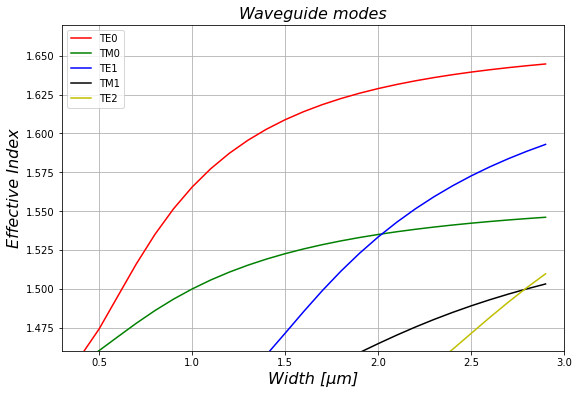

In [15]:
fig1 = plt.figure(figsize=(9,6))
plt.plot(width, TE0,'r',label = 'TE0')
plt.plot(width, TM0,'g',label = 'TM0')
plt.plot(width, TE1,'b',label = 'TE1')
plt.plot(width, TM1,'k',label = 'TM1')
plt.plot(width, TE2,'y',label = 'TE2')
plt.title('Waveguide modes', fontsize=16.0, fontstyle='oblique')
plt.xlabel('Width [μm]', fontsize=16.0, fontstyle='oblique')
plt.ylabel('Effective Index', fontsize=16.0, fontstyle='oblique')
plt.ylim(1.46,1.67)
plt.xlim(0.3,3)
plt.grid()
plt.legend()

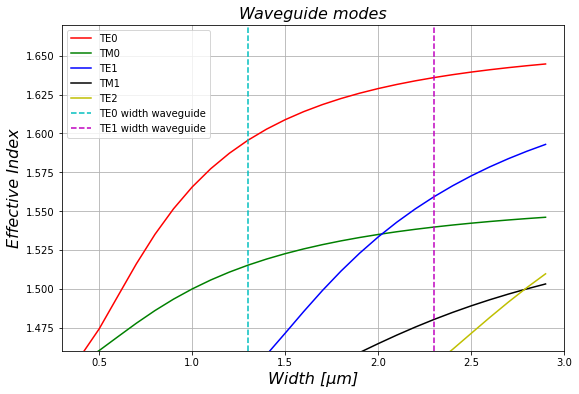

In [16]:
fig2 = plt.figure(figsize=(9,6))
plt.plot(width, TE0,'r',label = 'TE0')
plt.plot(width, TM0,'g',label = 'TM0')
plt.plot(width, TE1,'b',label = 'TE1')
plt.plot(width, TM1,'k',label = 'TM1')
plt.plot(width, TE2,'y',label = 'TE2')
plt.axvline(x = 1.3, color = "c", ls='--',label = "TE0 width waveguide")
plt.axvline(x = 2.3, color = "m", ls='--', label = "TE1 width waveguide")
plt.title('Waveguide modes', fontsize=16.0, fontstyle='oblique')
plt.xlabel('Width [μm]', fontsize=16.0, fontstyle='oblique')
plt.ylabel('Effective Index', fontsize=16.0, fontstyle='oblique')
plt.ylim(1.46,1.67)
plt.xlim(0.3,3)
plt.grid()
plt.legend()